In [3]:
#Bibliothek

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import scipy.io
from PIL import Image 
from sklearn.decomposition import PCA
from matplotlib import image as mimage



Imagem salva em ./galaxies_survey_grid.png


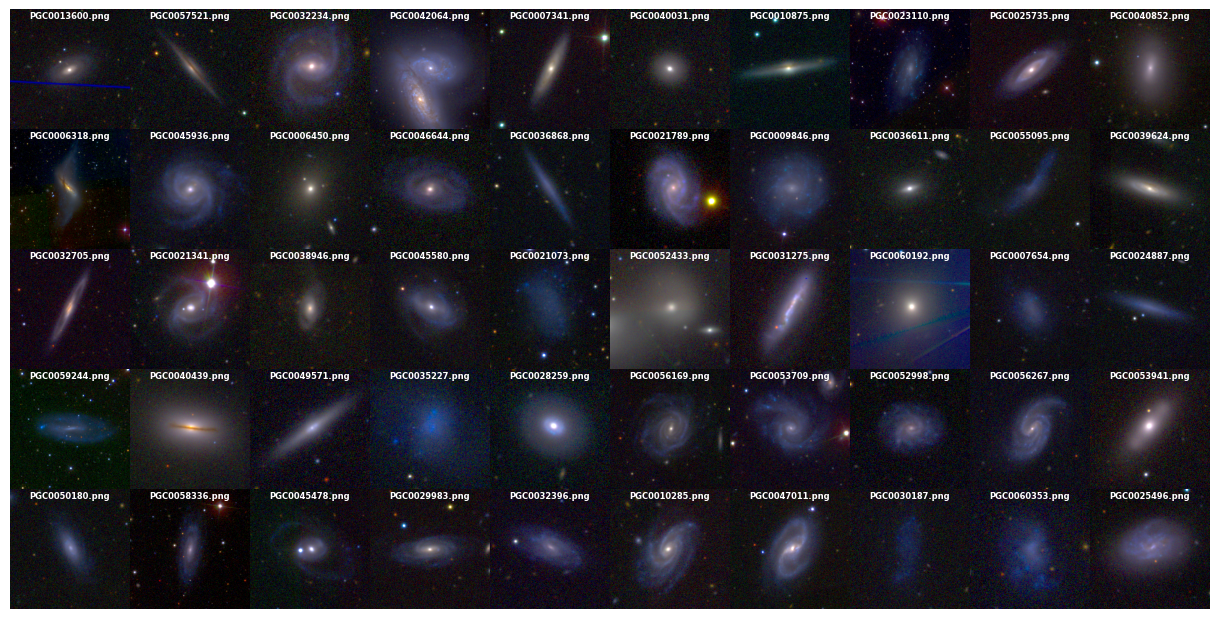

In [4]:
#### Plotar biblioteca de imagens ######

# Diretório das imagens
base_dir = './png'

# Lista de imagens no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.png')]

# Selecionar aleatoriamente 50 imagens
num_selected = min(50, len(image_files))  # Caso tenha menos de 50 imagens
selected_files = random.sample(image_files, num_selected)

# Definir número de colunas e calcular número de linhas
cols = 10  # Número de colunas
rows = (num_selected + cols - 1) // cols  # Garante que todas as imagens sejam exibidas

# Criar a figura para o plot
fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.2, rows * 1.2), gridspec_kw={'hspace': 0, 'wspace': 0})
axes = axes.flatten()  # Transformar a matriz de eixos em uma lista

# Exibir cada imagem
for ax, image_file in zip(axes, selected_files):
    image_path = os.path.join(base_dir, image_file)
    img = Image.open(image_path)
    ax.imshow(img, aspect='auto')
    ax.axis('off')  # Ocultar eixos
    ax.text(0.5, 0.98, image_file, ha='center', va='top', fontsize=6, color='white', weight='bold', transform=ax.transAxes)  

# Desativar eixos vazios
for ax in axes[len(selected_files):]:
    ax.axis('off')

# Ajustar layout para otimizar espaço
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0)

# Salvar a figura
output_path = './galaxies_survey_grid.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=150)  # Aumentar DPI para melhorar qualidade
print(f"Imagem salva em {output_path}")

# Exibir a figura
plt.show()


In [5]:
# PCA

base_dir = './png'
# Inicializar a lista para armazenar as imagens
image_list = []

# Obter todos os arquivos de imagem no diretório
image_files = [f for f in os.listdir(base_dir) if f.endswith('.png')]  # Ajuste a extensão conforme necessário

for image_name in image_files:
    img_path = os.path.join(base_dir, image_name)
    img = Image.open(img_path).convert('L')  # Converte a imagem para escala de cinza
    img_array = np.array(img).flatten()  # Achata a imagem mantendo tamanho original
    image_list.append(img_array)

# Verificar se a lista de imagens está vazia
if not image_list:
    raise ValueError("Nenhuma imagem foi carregada. Verifique o diretório e os arquivos.")

# Convertendo a lista para um array numpy
X = np.array(image_list)

# Verificar se X tem pelo menos 2 dimensões
if len(X.shape) != 2:
    raise ValueError("O array X não tem o formato esperado. Verifique o carregamento das imagens.")

# Calcular o PCA
n_components = min(X.shape[0], X.shape[1])  # Número máximo de componentes possíveis
pca = PCA(n_components=n_components)
pca.fit(X)

# Selecionar as componentes principais mais relevantes
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
num_relevant_components = np.argmax(cumulative_variance >= 0.95) + 1  # Pega componentes que explicam 95% da variância

def plot_eigenfaces(eigenvectors, image_shape, num_eigenfaces):
    num_cols = 3  # Número de colunas desejadas
    num_rows = (num_eigenfaces + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    
    plt.figure(figsize=(12, 10))  # Ajusta o tamanho da figura
    
    for i in range(num_eigenfaces):
        plt.subplot(num_rows, num_cols, i + 1)
        eigenface = eigenvectors[i].reshape(image_shape)
        plt.imshow(eigenface, cmap=plt.cm.gray)
        
        plt.text(
            0.5, 1.05, f'e={i + 1}', color='red', fontsize=14, ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.75, edgecolor='none', boxstyle='round,pad=0.3')
        )
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Determinar o formato original da imagem
image_shape = Image.open(os.path.join(base_dir, image_files[0])).convert('L').size[::-1]

# Plotar as componentes principais mais relevantes
plot_eigenfaces(pca.components_[:num_relevant_components], image_shape, num_eigenfaces=num_relevant_components)


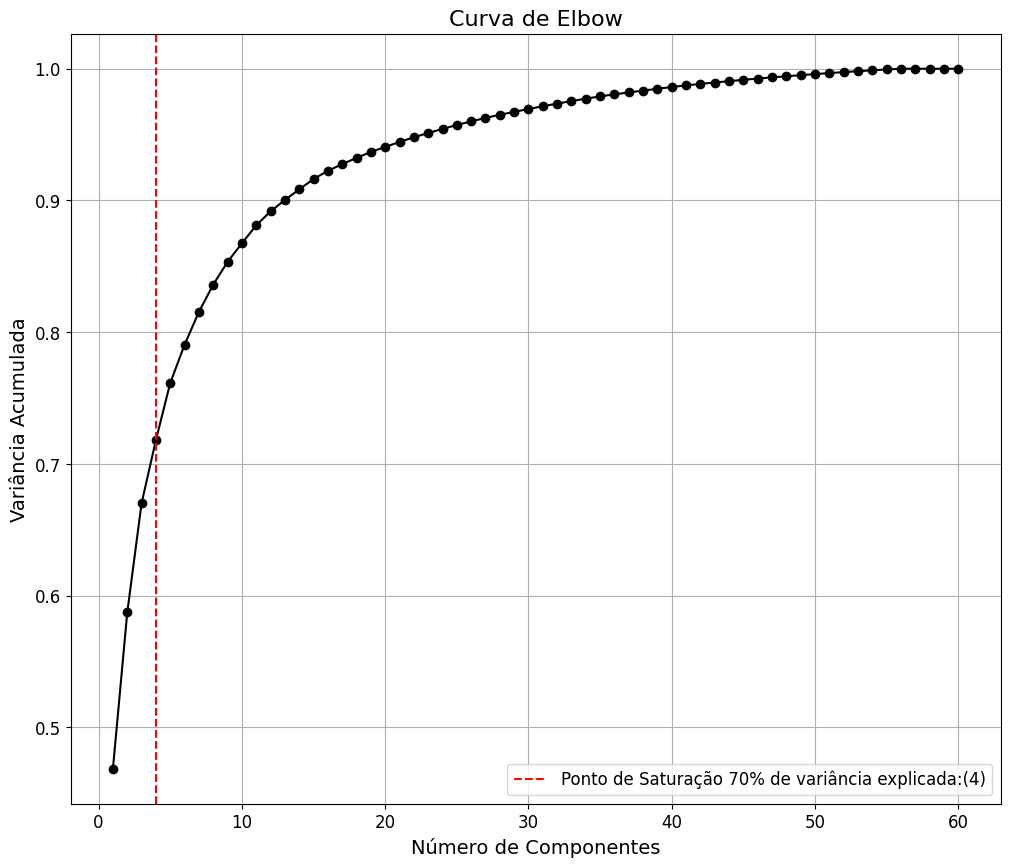

In [ ]:
#CURVA DE ELBOW

# Encontrar o ponto de saturação (cotovelo)
threshold = 0.70  # Por exemplo, 70% de variância explicada
elbow_point = np.argmax(cumulative_variance >= threshold) + 1

# Plotar a Curva de Elbow
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='black', marker='o', linestyle='-')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Ponto de Saturação 70% de variância explicada:({elbow_point})')

# Ajustes de estilo
plt.xlabel('Número de Componentes', fontsize=14)
plt.ylabel('Variância Acumulada', fontsize=14)
plt.title('Curva de Elbow', fontsize=16)

plt.legend(loc='best', fontsize=12)
plt.grid(True)  # Remove a grade do gráfico

# Ajustar tamanhos dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
